In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 


In [1]:
pip install -U kaleido

     |████████████████████████████████| 79.9 MB 124 kB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/CSE, BUET: PG/CSE 6305 Programming Languages and Systems/6305 Project/CSE6305 STATS - Dacapo.csv')

In [5]:
df.fillna(0)

,Benchmark,GC,Throughput percentage (%),JVM heap size allocation (mb),JVM heap size peak (mb),Average allocation rate (the object creation rate by the application) mbps,Average pause time (ms),Maximum pause time (ms),Total concurrent time (ms)
0,h2,g1_default,90.210,642,441,127.27,62.400,420.000,0.00
1,h2,sh_default,99.901,774,745,42.74,1.080,41.100,14430.00
2,h2,z_default,99.947,982,748,74.39,0.292,0.825,12977.00
3,lusearch,g1_default,98.925,62,21,151.48,10.000,10.000,0.00
4,lusearch,sh_default,99.908,252,220,109.97,0.353,2.950,90.80
5,lusearch,z_default,99.960,338,300,62.60,0.358,1.810,88.60
6,luindex,g1_default,98.265,62,7,3.99,4.990,10.000,529.00
7,luindex,sh_default,99.905,62,5,0.00,1.830,6.320,2.86
8,luindex,z_default,99.994,96,10,1.21,0.160,0.204,15.10
9,pmd,g1_default,96.814,99,73,32.33,18.400,70.000,111.00


In [6]:
df.rename(columns = {'GC':'group'}, inplace = True)


In [7]:
import plotly.io as pio
from plotly.io import write_image
import plotly.express as px


In [8]:
for col in df.columns[2:]:
  fig = px.bar(df, x="Benchmark", y=col,
             color='group', barmode='group',text=col,
             height=400)
  fig_name = col
  write_image(fig,"/content/drive/MyDrive/CSE, BUET: PG/CSE 6305 Programming Languages and Systems/6305 Project/dacapo graphs/"+col+"_fig.png")
  fig.show()

In [9]:
df_ren_heap = pd.read_csv('/content/drive/MyDrive/CSE, BUET: PG/CSE 6305 Programming Languages and Systems/6305 Project/CSE6305 STATS - Renaissance_Heap_Size_Varying.csv')

In [10]:
df_ren_heap.columns

Index(['Benchmark', 'GC', 'JVM heap size allocation (mb)',
       'Throughput percentage (%)', 'JVM heap size peak (mb)',
       'Average allocation rate (mbps)', 'Average pause time (ms)',
       'Maximum pause time (ms)', 'Total concurrent time (ms)'],
      dtype='object')

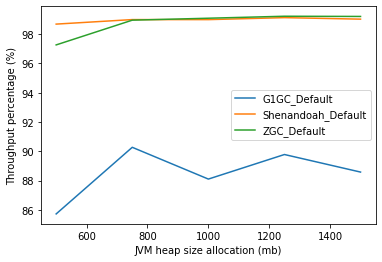

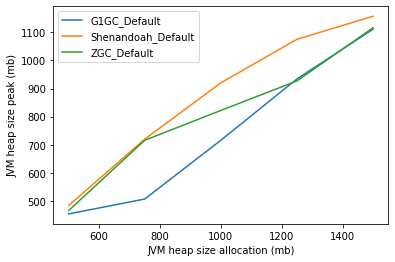

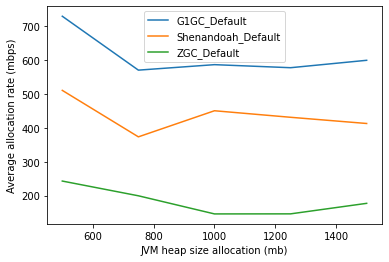

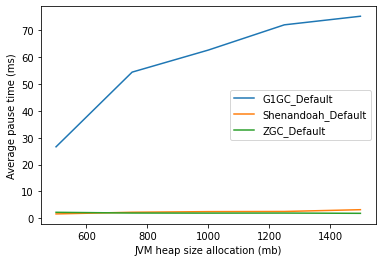

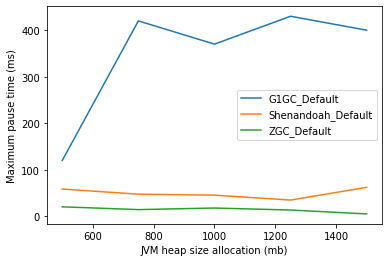

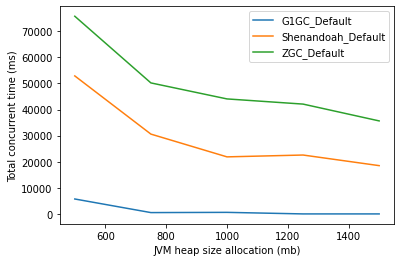

In [11]:

for i in range(3,9):
  chi = df_ren_heap[:15]
  #chi
  x = chi[chi.columns[2]].unique()
  y1 = chi.loc[chi['GC'] == "g1_default"][chi.columns[i]]
  y2 = chi.loc[chi['GC'] == "sh_default"][chi.columns[i]]
  y3 = chi.loc[chi['GC'] == "z_default"][chi.columns[i]]
  plt.plot(x,y1,label="G1GC_Default")
  plt.plot(x,y2,label="Shenandoah_Default")
  plt.plot(x,y3,label="ZGC_Default")
  plt.legend()
  plt.xlabel("JVM heap size allocation (mb)")
  plt.ylabel(chi.columns[i])

  name= "chi/"+chi.columns[i] +".png"
  plt.savefig("/content/drive/MyDrive/CSE, BUET: PG/CSE 6305 Programming Languages and Systems/6305 Project/renaissance heap size vary graphs/"+name)
  plt.show()

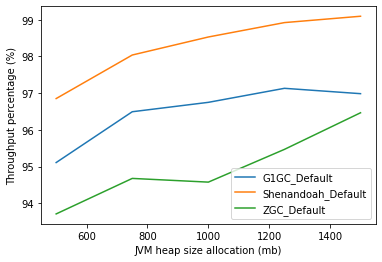

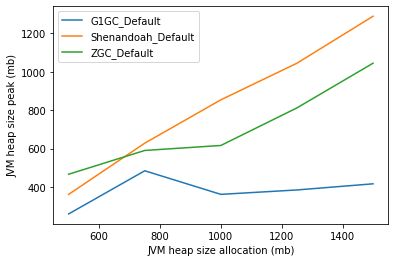

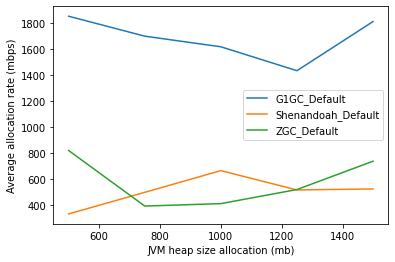

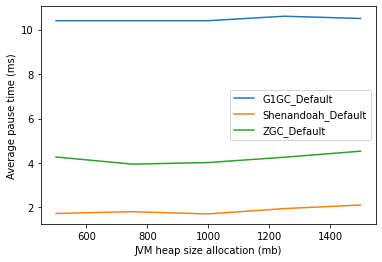

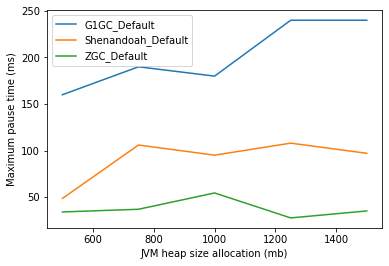

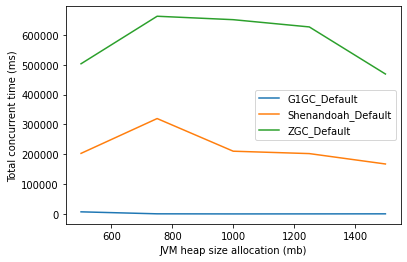

In [12]:
for i in range(3,9):
  ml = df_ren_heap[15:30]
  ml
  
  x = ml[ml.columns[2]].unique()
  y1 = ml.loc[ml['GC'] == "g1_default"][ml.columns[i]]
  y2 = ml.loc[ml['GC'] == "sh_default"][ml.columns[i]]
  y3 = ml.loc[ml['GC'] == "z_default"][ml.columns[i]]
  plt.plot(x,y1,label="G1GC_Default")
  plt.plot(x,y2,label="Shenandoah_Default")
  plt.plot(x,y3,label="ZGC_Default")
  plt.legend()
  plt.xlabel("JVM heap size allocation (mb)")
  plt.ylabel(ml.columns[i])

  name= "ml/"+ml.columns[i] +".png"
  plt.savefig("/content/drive/MyDrive/CSE, BUET: PG/CSE 6305 Programming Languages and Systems/6305 Project/renaissance heap size vary graphs/"+name)
  plt.show()

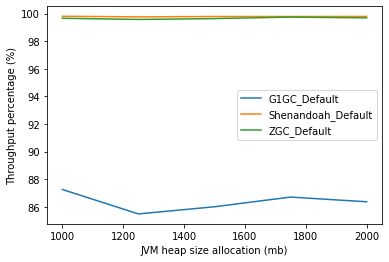

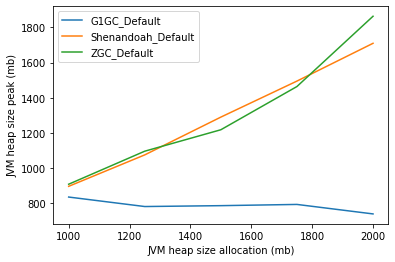

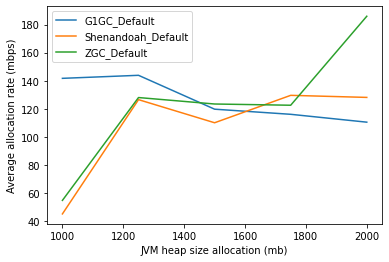

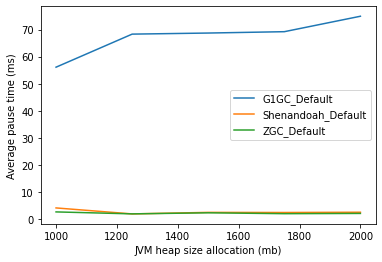

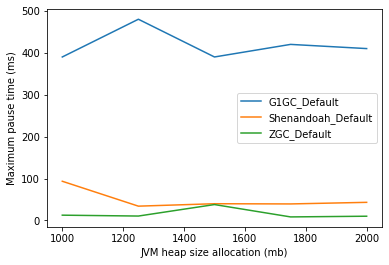

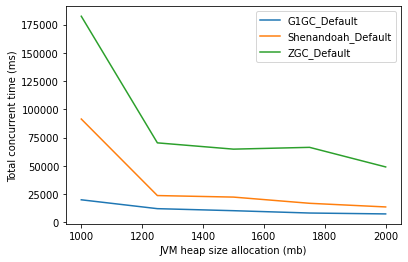

In [13]:
for i in range(3,9):
  pagerank = df_ren_heap[30:46]
  
  x = pagerank[pagerank.columns[2]].unique()
  y1 = pagerank.loc[pagerank['GC'] == "g1_default"][pagerank.columns[i]]
  
  y2 = pagerank.loc[pagerank['GC'] == "sh_default"][pagerank.columns[i]]
  y3 = pagerank.loc[pagerank['GC'] == "z_default"][pagerank.columns[i]]
  plt.plot(x,y1,label="G1GC_Default")
  plt.plot(x,y2,label="Shenandoah_Default")
  plt.plot(x,y3,label="ZGC_Default")
  plt.legend()
  plt.xlabel("JVM heap size allocation (mb)")
  plt.ylabel(pagerank.columns[i])

  name= "pr/"+pagerank.columns[i] +".png"
  plt.savefig("/content/drive/MyDrive/CSE, BUET: PG/CSE 6305 Programming Languages and Systems/6305 Project/renaissance heap size vary graphs/"+name)
  plt.show()

In [42]:
df_ren = pd.read_csv('/content/drive/MyDrive/CSE, BUET: PG/CSE 6305 Programming Languages and Systems/6305 Project/CSE6305 STATS - Renaissance.csv')

In [43]:
df_ren.rename(columns = {'GC':'group'}, inplace = True)
import plotly.io as pio
from plotly.io import write_image
import plotly.express as px
for col in df_ren.columns[2:]:
  fig = px.bar(df_ren, x="Benchmark", y=col,
             color='group', barmode='group',text=col,
             height=400)
  fig_name = col
  write_image(fig,"/content/drive/MyDrive/CSE, BUET: PG/CSE 6305 Programming Languages and Systems/6305 Project/renaissance graphs/"+col+"_fig.png")
  fig.show()